In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

### Exploring the dataset

In [3]:
data = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/USL/Day_4/USL Case Study/Country-data (1).csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

**Column Name: 	Description**
* country:	Name of the country
* child_mort:	Death of children under 5 years of age per 1000 live births
* exports:	Exports of goods and services per capita. Given as %age of the GDP per capita
* health: 	Total health spending per capita. Given as %age of GDP per capita
* imports:	Imports of goods and services per capita. Given as %age of the GDP per capita
* Income: 	Net income per person
* Inflation:	The measurement of the annual growth rate of the Total GDP
* life_expec:	The average number of years a new born child would live if the current mortality patterns are to remain the same
* total_fer:	The number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp:	The GDP per capita. Calculated as the Total GDP divided by the total population.


In [5]:
# Since country is an unique identifier of row let set it to index
data.set_index('country',inplace=True)
data.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

In [6]:
# lets see the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [7]:
# Lets look at the five point summary of the dataset
data.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

**Inference:**

* All the economic factors like exports, imports, income, inflation and GDP are right skewed. Shows huge variations in economic conditions of countries.
* Health factors like child mortalility, health and total fertility are also skewed which shows huge variations in health conditions of population in countries. 

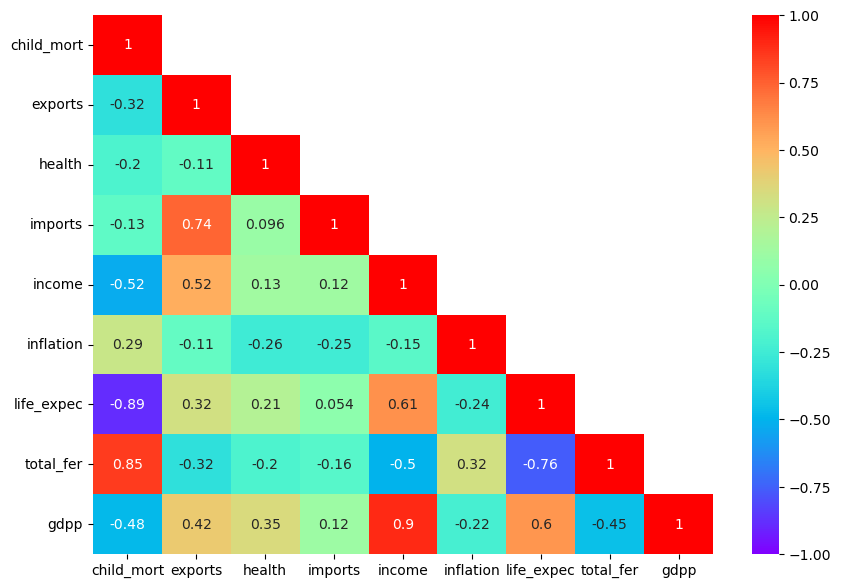

In [9]:
# lets explore kind of relation these factors have among themselves
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,cmap='rainbow',
           mask=np.triu(data.corr(),k=1))
plt.show()

**Inference:**

* Higher GDP leads to higher net income per person.
* Countries with higher fertility have higher child mortality rate. This could mean poor healthcare structure in a country.
* Countries with better life expectancy have less total fertility which indicates better healthcare.
* Countries with better income has better life expectancy.
* Countries with better exports have better income hence spending on imports are also better.

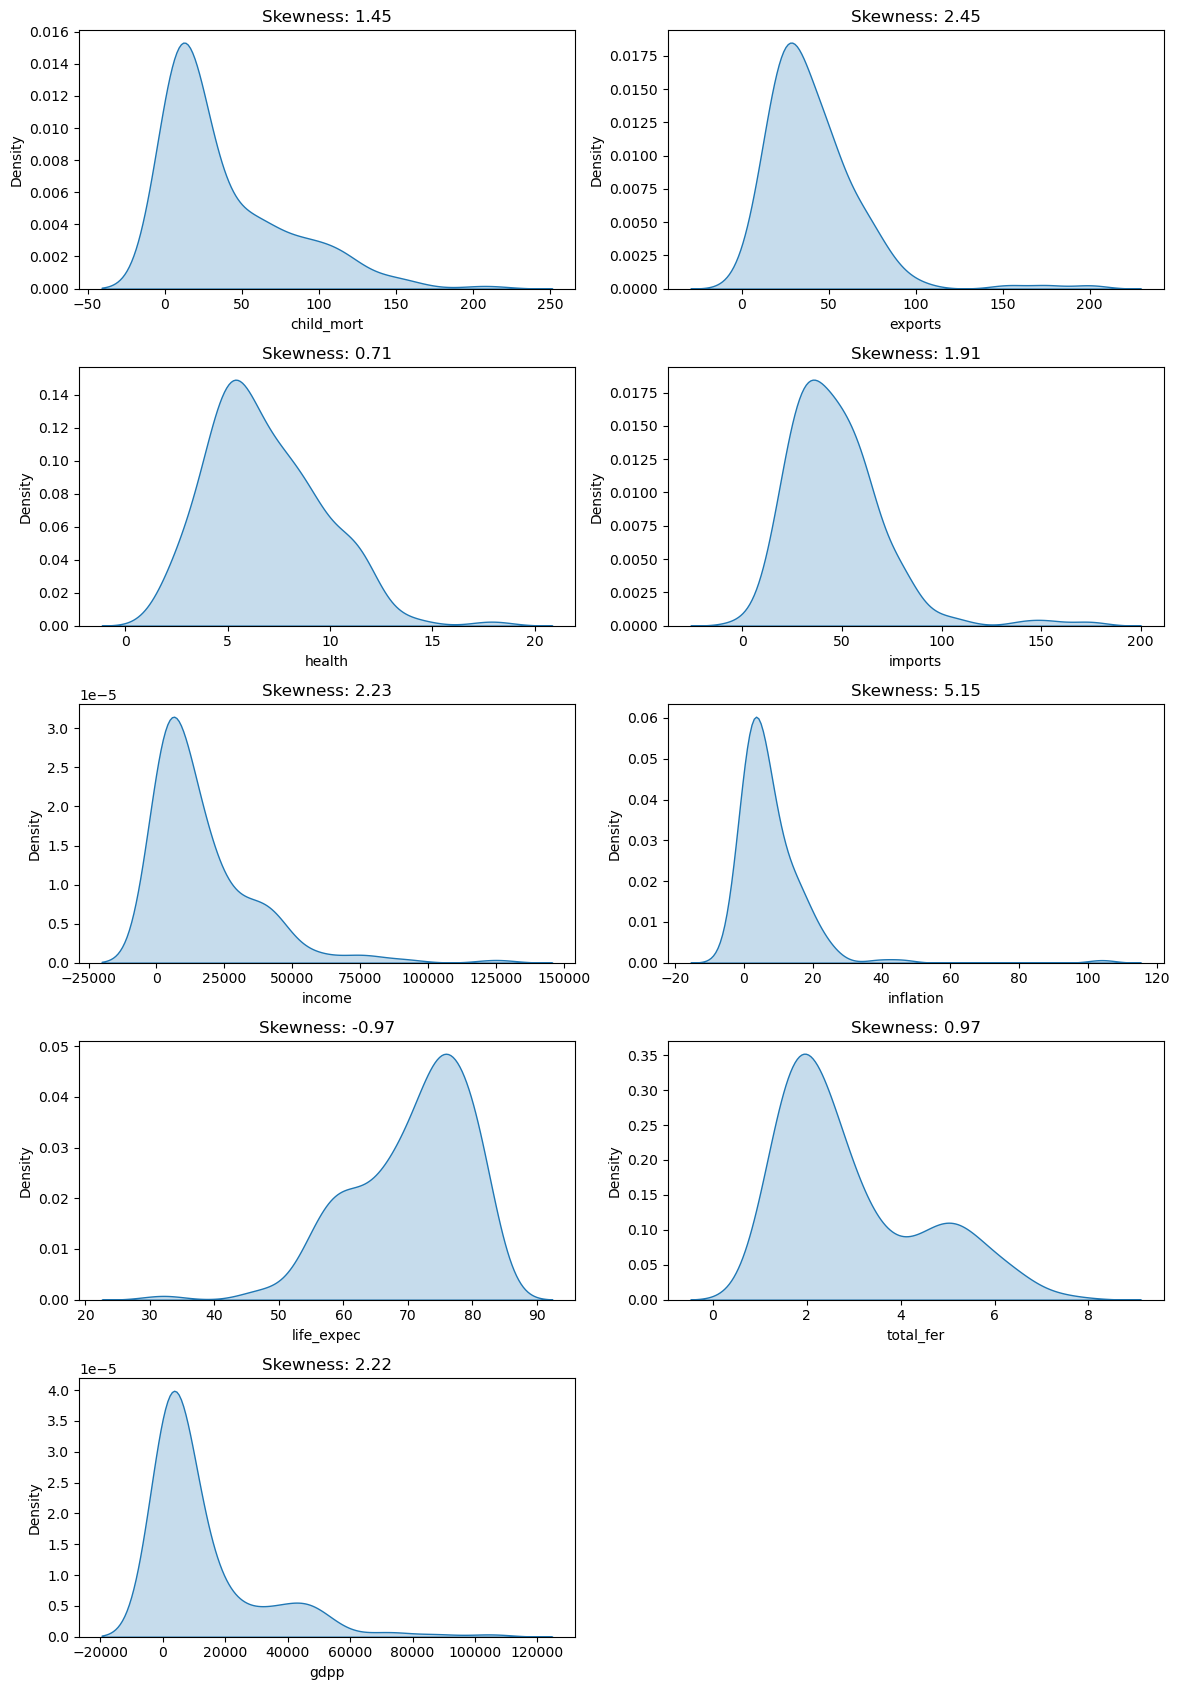

In [11]:
# Univariate Analysis
t=1
plt.figure(figsize=(12,17))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

**Inference:**
* Most of the columns are highly right skewed.
* Health is moderatly right skewed. While life expectancy is moderatlty left skewed.
* 
* 
* 

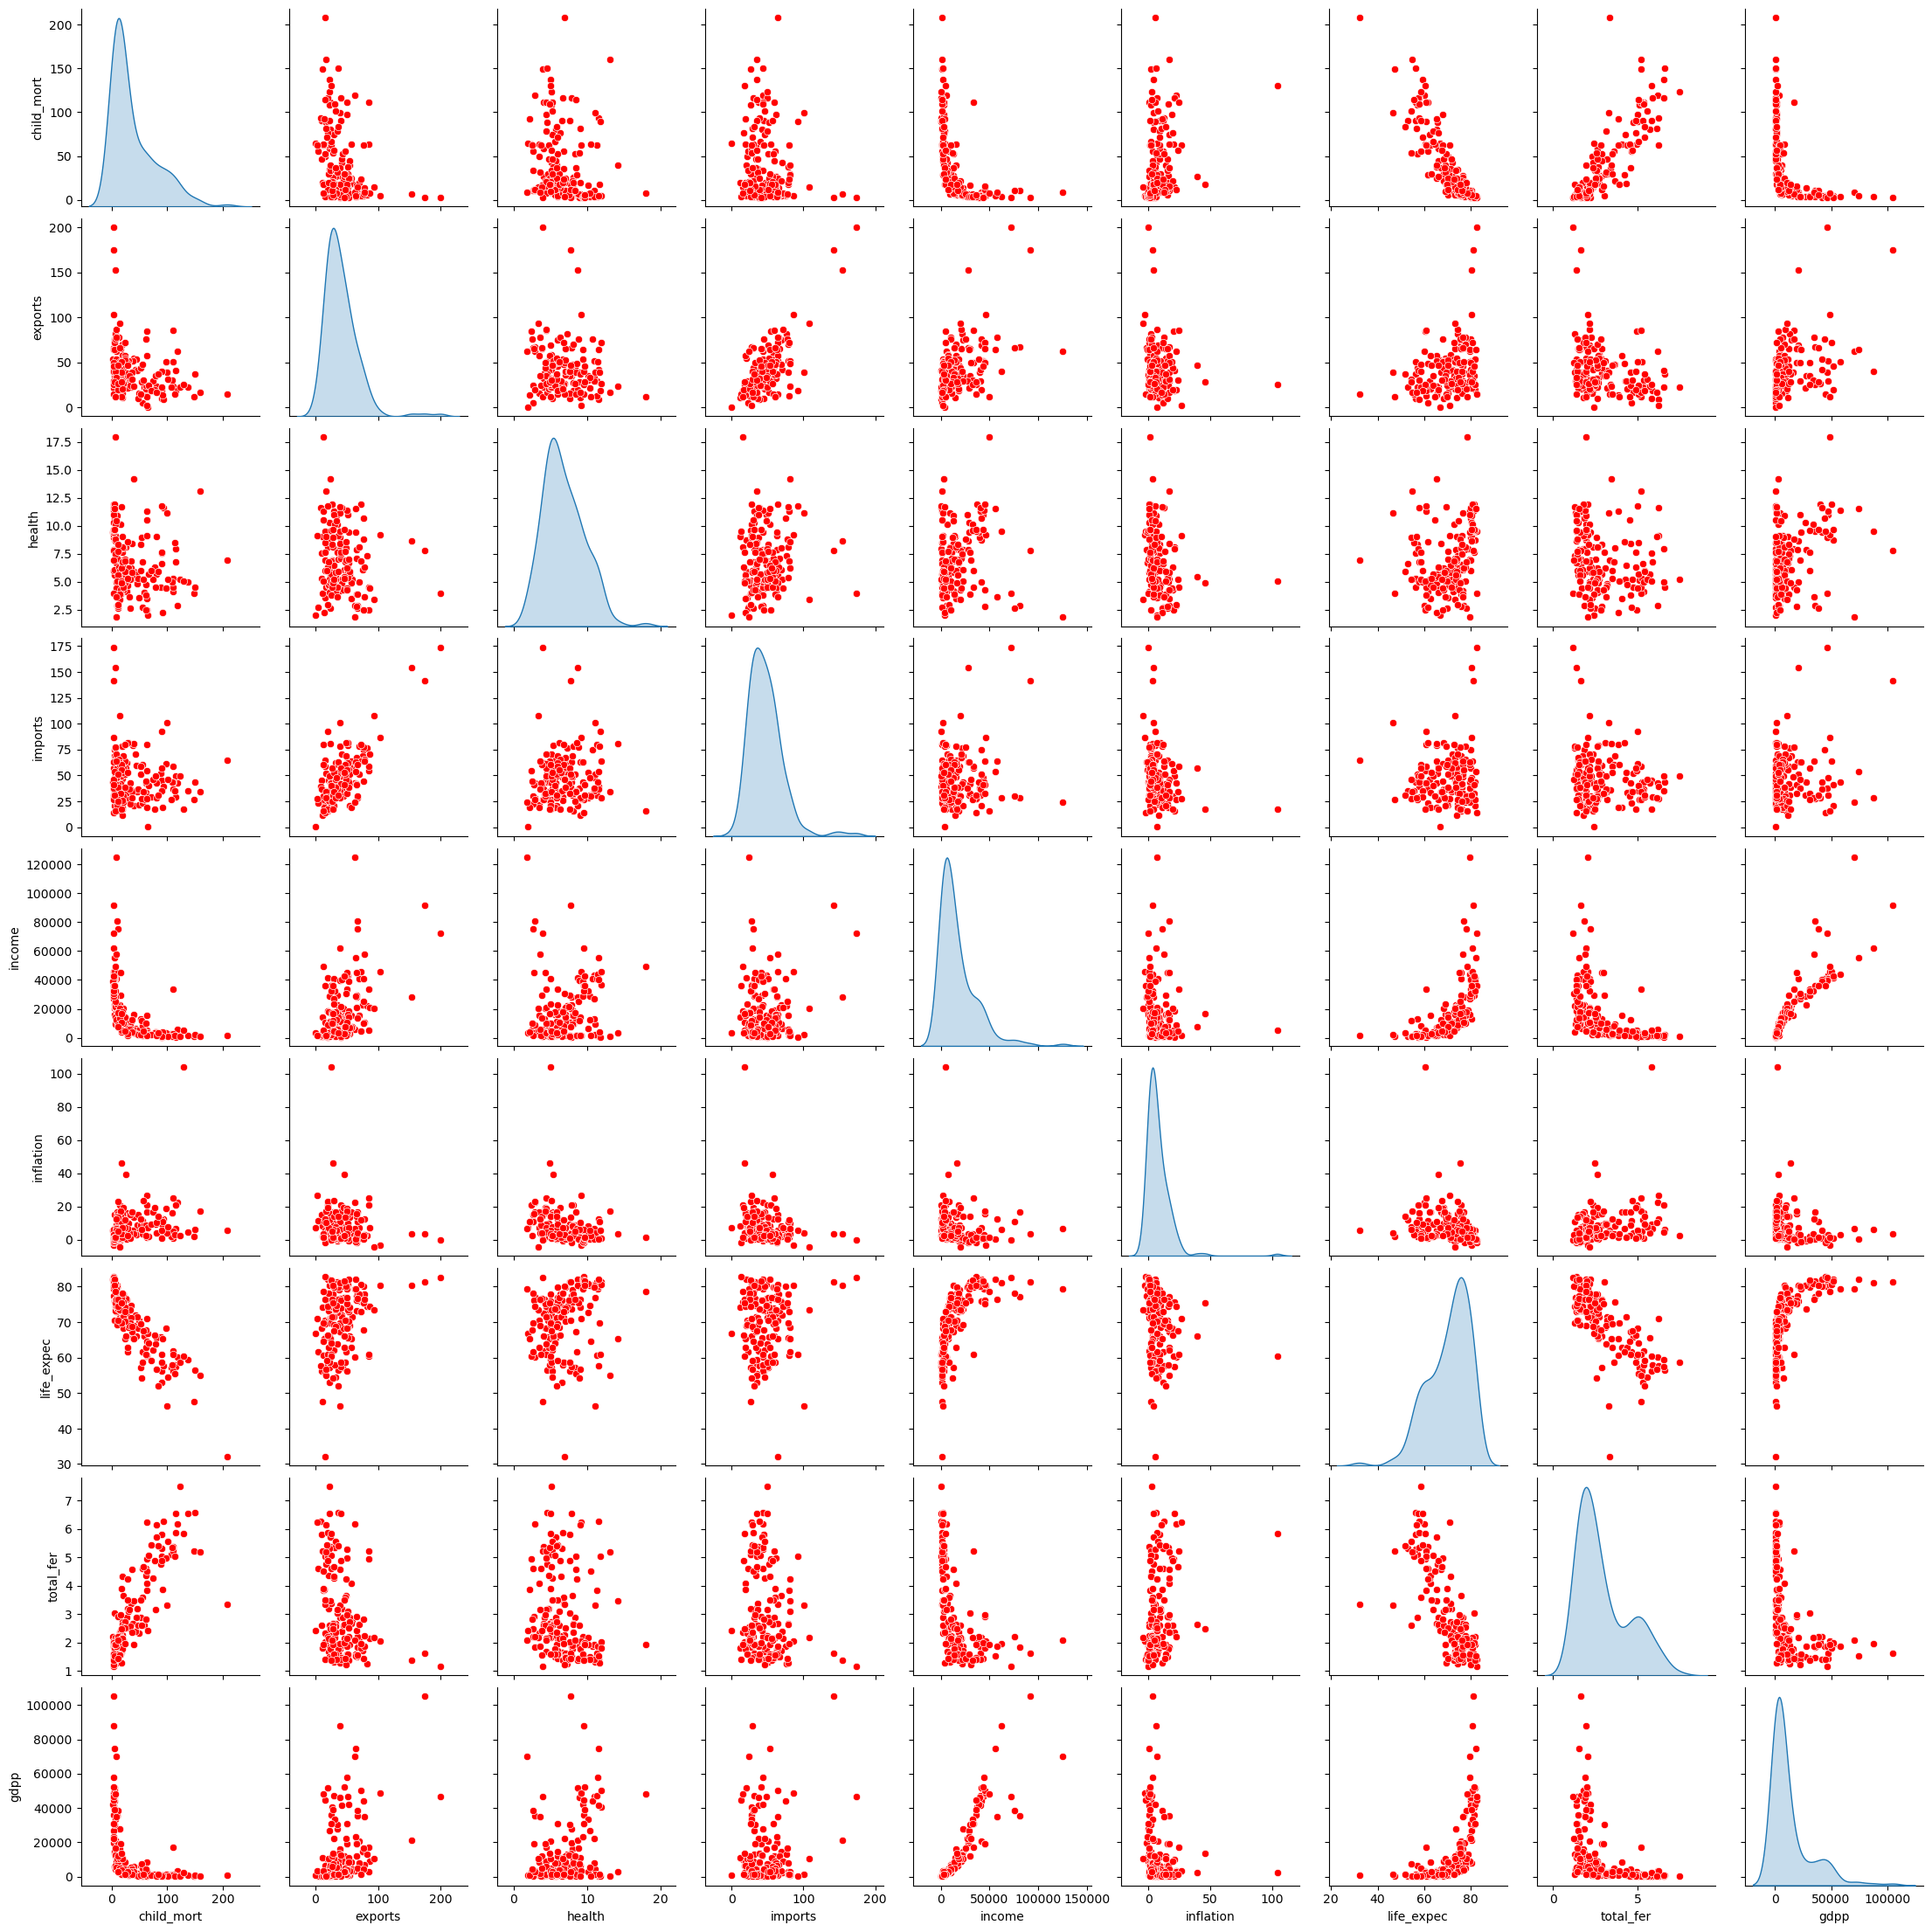

In [13]:
# Multivariate analysis
sns.pairplot(data,diag_kind='kde',plot_kws={'color':'red'})
plt.show()

### Data Preprocessing

In [15]:
# Lets check for null values
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

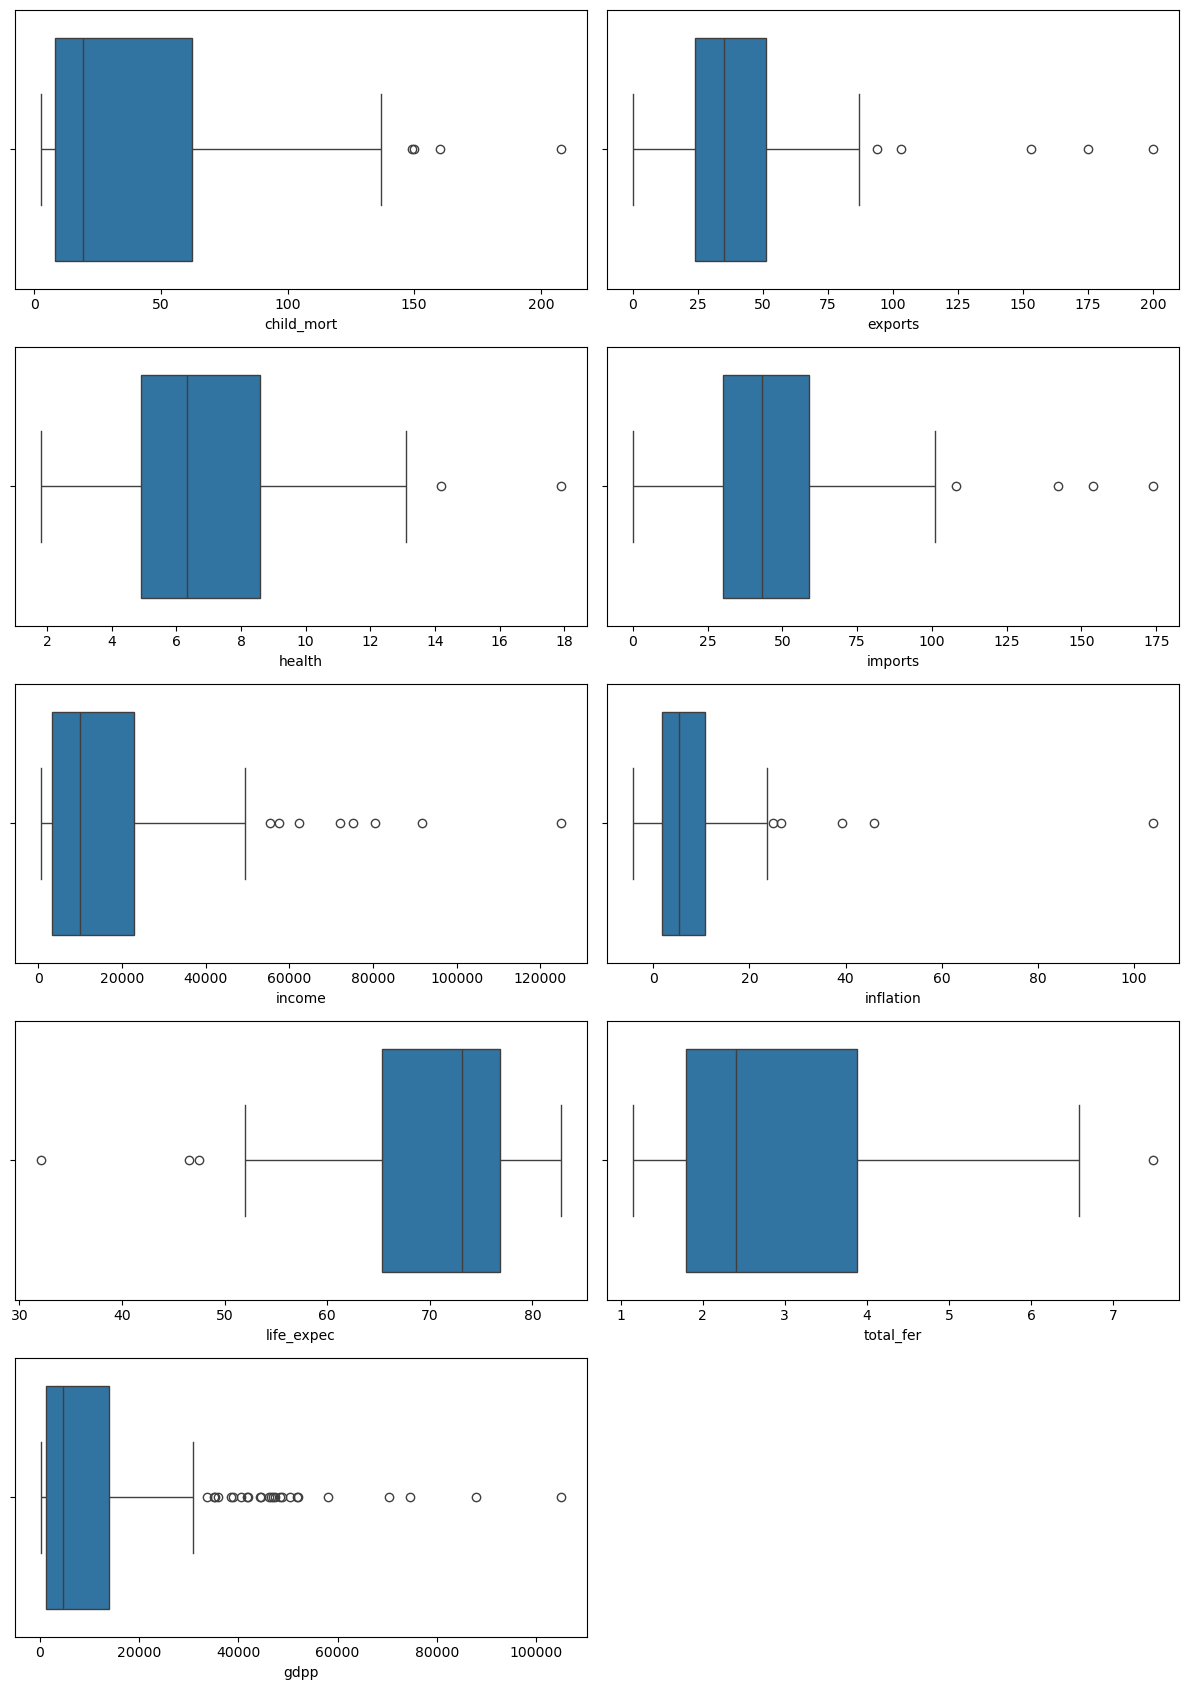

In [16]:
# Lets Check for Outliers
t=1
plt.figure(figsize=(12,17))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

In [17]:
# Lets go with capping the extreme outliers. by taking whisker lenght as
# 2.5*IQR

for i in data.columns:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr = q3-q1
    ul,ll = q3+2.5*iqr,q1-2.5*iqr
    data[i] = data[i].apply(lambda x: ul if x>ul else ll if x<ll
                           else x)

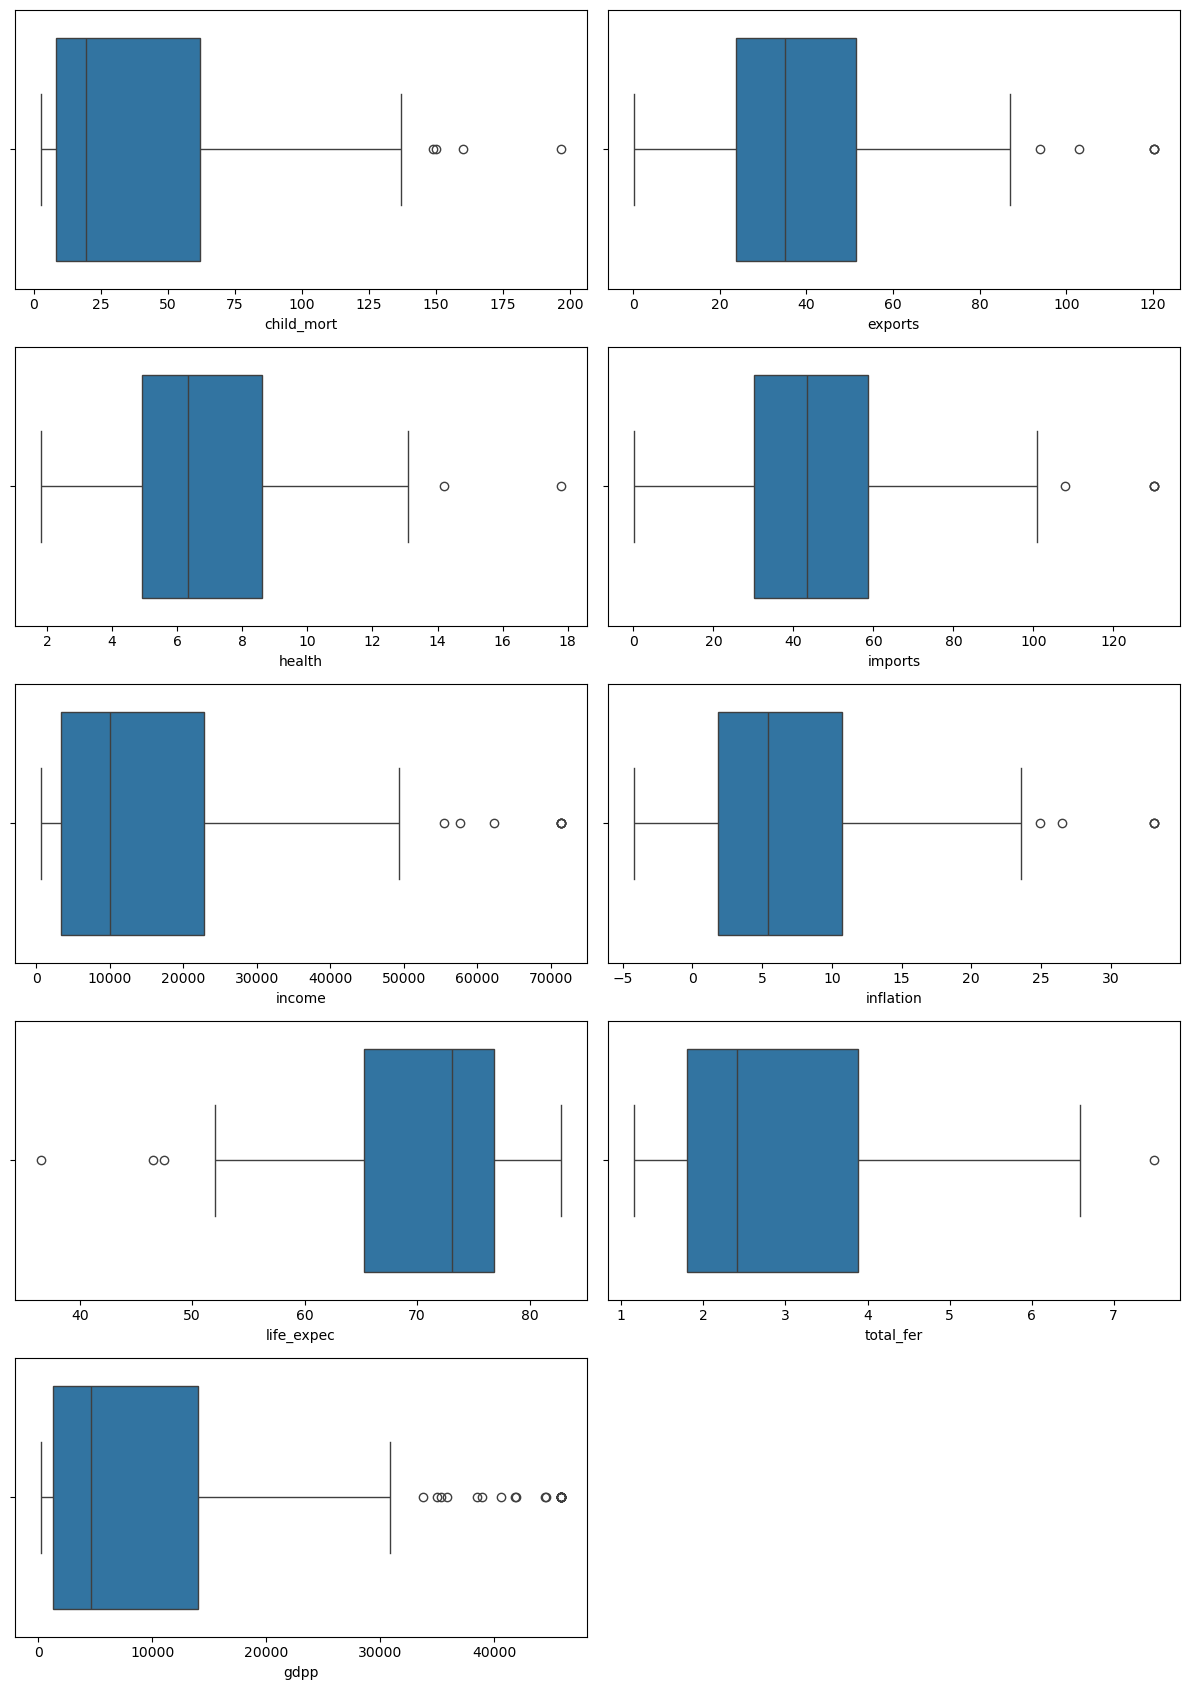

In [18]:
t=1
plt.figure(figsize=(12,17))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

In [19]:
# Scalling (Standardize the data)
scaler = StandardScaler()
data_s = pd.DataFrame(scaler.fit_transform(data),columns=data.columns,
                      index=data.index)

In [20]:
data_s

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.302168 -1.314143  0.279553 -0.068565 -0.878427   
Albania               -0.540991 -0.528460 -0.096883  0.099062 -0.391534   
Algeria               -0.273031 -0.074510 -0.966706 -0.680176 -0.217727   
Angola                 2.023403  0.968702 -1.449130 -0.159174 -0.627373   
Antigua and Barbuda   -0.698761  0.235398 -0.286928  0.565699  0.145102   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.225450  0.283412 -0.571997  0.284811 -0.800009   
Venezuela             -0.528469 -0.506636 -0.696257 -1.305379 -0.007052   
Vietnam               -0.373203  1.392098  0.009104  1.530685 -0.709887   
Yemen                  0.453213 -0.441162 -0.597580 -0.544262 -0.710472   
Zambia                 1.124363 -0.135619 -0.338094 -0.702828 -0.780697   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.303790   -1.642400   1.902882 -0.767399  
Albania              -0.381016    0.652932  -0.859973 -0.526335  
Algeria               1.225166    0.675771  -0.038404 -0.501118  
Angola                2.096738   -1.197037   2.128151 -0.564502  
Antigua and Barbuda  -0.802968    0.710030  -0.541946  0.026399  
...                        ...         ...        ...       ...  
Vanuatu              -0.639721   -0.865869   0.365754 -0.602669  
Venezuela             3.577027    0.550156  -0.316678  0.115000  
Vietnam               0.671787    0.287506  -0.661206 -0.715806  
Yemen                 2.262752   -0.351989   1.140944 -0.715806  
Zambia                0.934642   -2.122021   1.624609 -0.705582  

[167 rows x 9 columns]

### PCA

In [22]:
pca = PCA(n_components=9)
pca.fit(data_s)

PCA(n_components=9)

In [23]:
# Lets see the eigen values
pca.explained_variance_

array([4.30850704, 1.51337327, 1.22641085, 0.92104999, 0.60026658,
       0.21134307, 0.143956  , 0.0850118 , 0.04429827])

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697,
       0.96981892, 0.98571825, 0.99510744, 1.        ])

We will go with top 5 PC's explaining approx ~95% varaince in the data

In [26]:
pca_final = PCA(n_components=5)
pca_data = pca_final.fit_transform(data_s)

In [27]:
pca_data = pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5'],
                       index=data.index)

In [28]:
pca_data

PC1       PC2       PC3       PC4       PC5
country                                                              
Afghanistan         -3.043637 -0.201155  0.951322  0.793445 -0.006800
Albania              0.423415 -0.371463  0.171749 -1.353581  0.088623
Algeria             -0.404684 -0.440312 -1.636775 -0.573008  0.397119
Angola              -3.150063  1.425283 -1.784982  1.580071  0.142609
Antigua and Barbuda  1.145313  0.392985  0.151332 -0.823193 -0.370311
...                       ...       ...       ...       ...       ...
Vanuatu             -0.828141  0.812072  0.314558 -0.715821 -0.527346
Venezuela           -0.572007 -1.456583 -3.029355  0.232195  1.994067
Vietnam              0.391400  1.868710 -0.234175 -0.909466  1.304821
Yemen               -2.149101 -0.302415 -1.489883  0.348609  1.128099
Zambia              -3.010673  0.216450 -0.245995  0.970270 -0.008693

[167 rows x 5 columns]

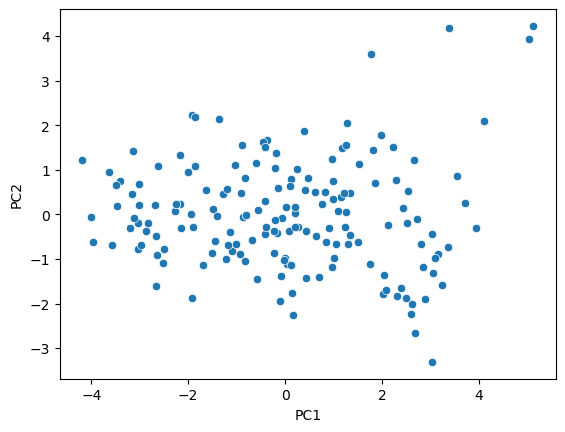

In [29]:
# lets visualize PC1 and PC2
sns.scatterplot(data=pca_data,x='PC1',y='PC2')
plt.show()

## Clustering

In [31]:
# Imports for clusting
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
# for Kmeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# For Aggloromative
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.metrics.pairwise import euclidean_distances

### K-Means Clsutering

In [33]:
# Decide the value of K

kelbow = KElbowVisualizer(estimator=KMeans(random_state=0),k=12)

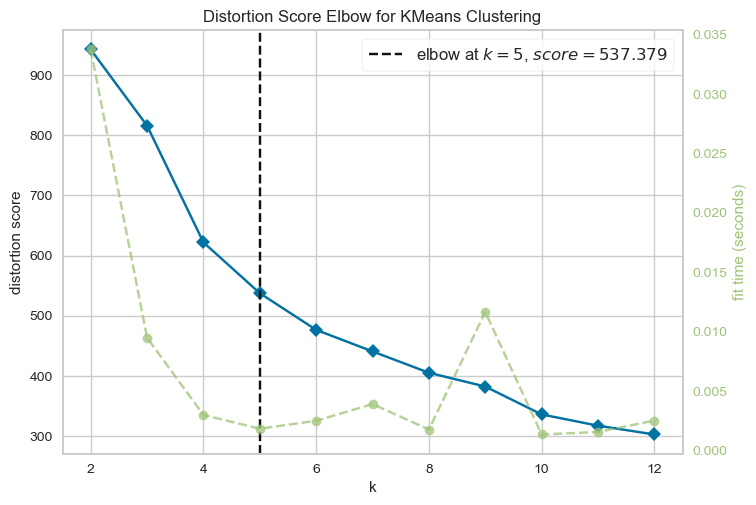

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
kelbow.fit(pca_data)
kelbow.show()

In [35]:
# It is difficult to locate the elbow in the above plot. Hence we will look
# at silhotte visualizer to decide the value of k.

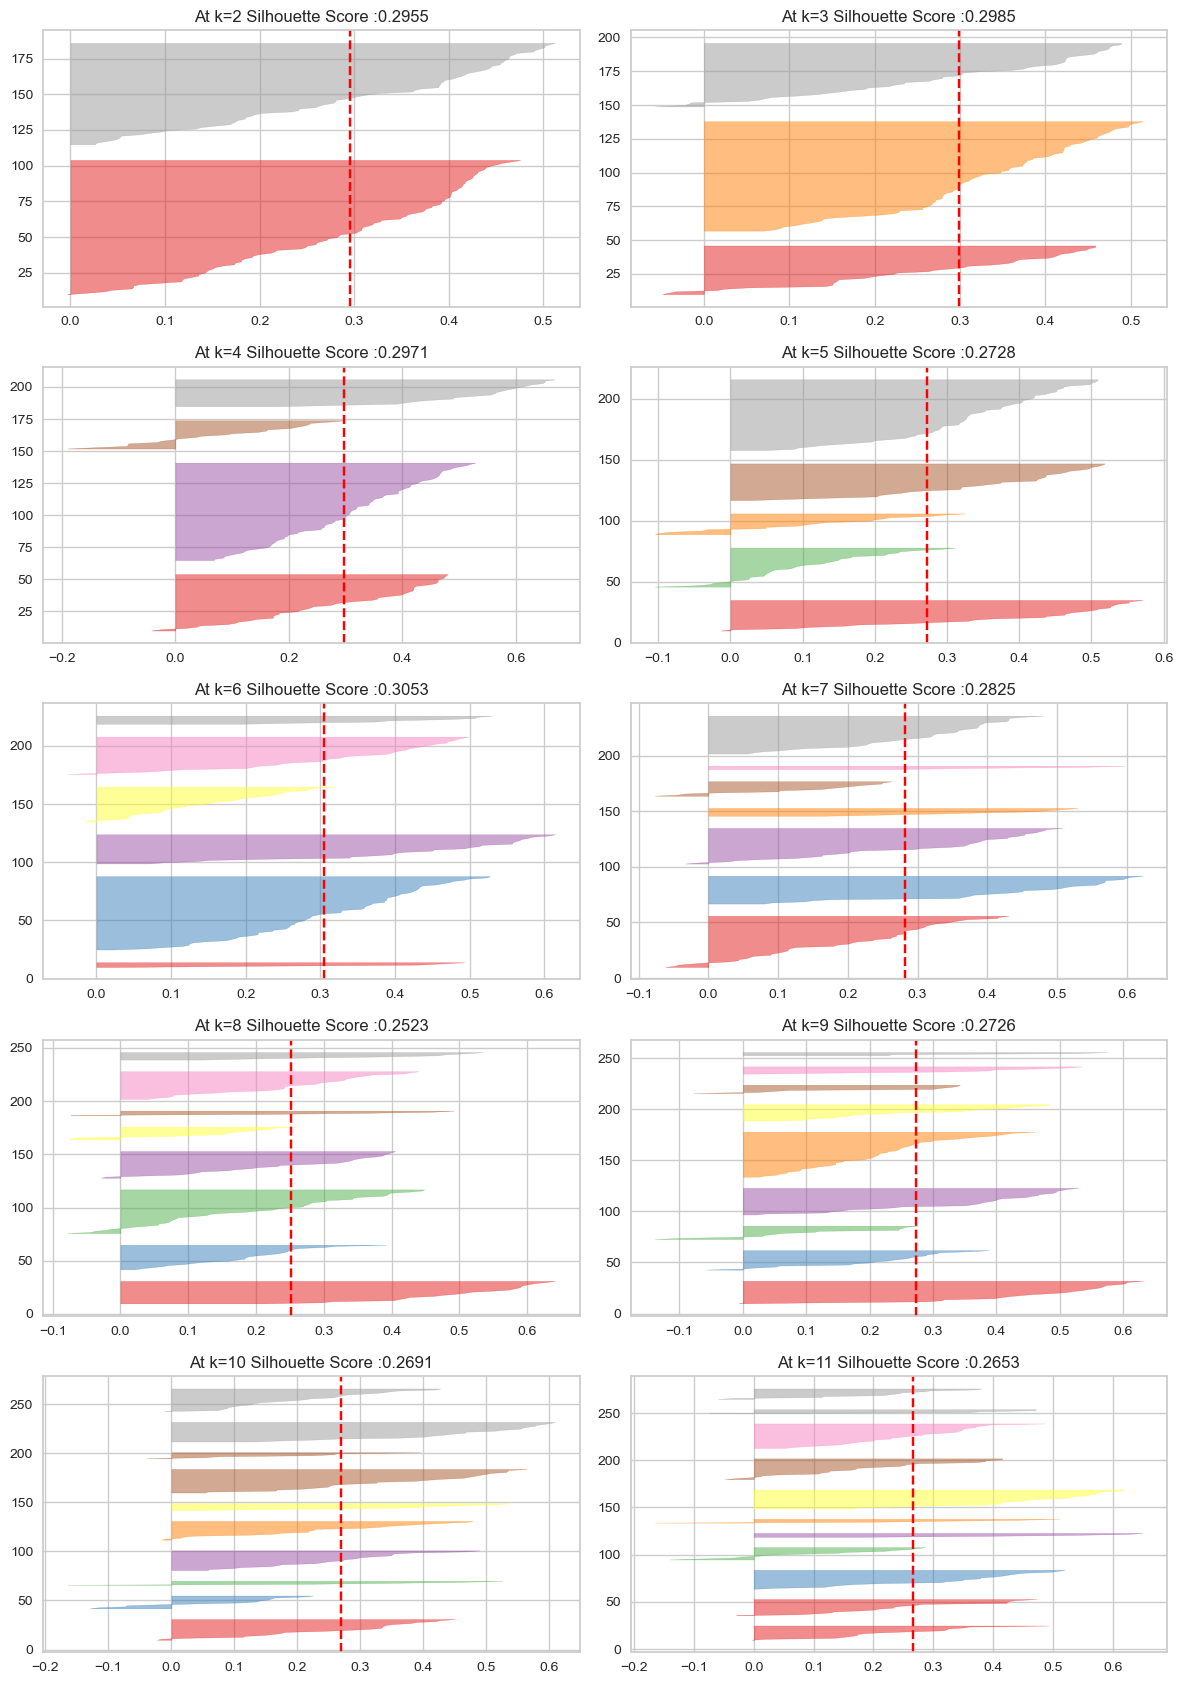

In [36]:
t=1
plt.figure(figsize=(12,17))
for i in range(2,12):
    plt.subplot(5,2,t)
    model = KMeans(n_clusters=i,random_state=0,n_init=10)
    sil_vis = SilhouetteVisualizer(model)
    sil_vis.fit(pca_data)
    plt.title(f'At k={i} Silhouette Score :{round(sil_vis.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()
    

**Inference:**

* Although we are getting almost same score at k=2 and k=3. We can proceed with k=3. In case we dont get any significant business interpretations we will go with k=2.
* K>3 has oultliers and very thin bands indication clusters with low densities.

In [38]:
kmean_final = KMeans(n_clusters=3,random_state=0,n_init=10)
kmean_pred = kmean_final.fit_predict(pca_data)

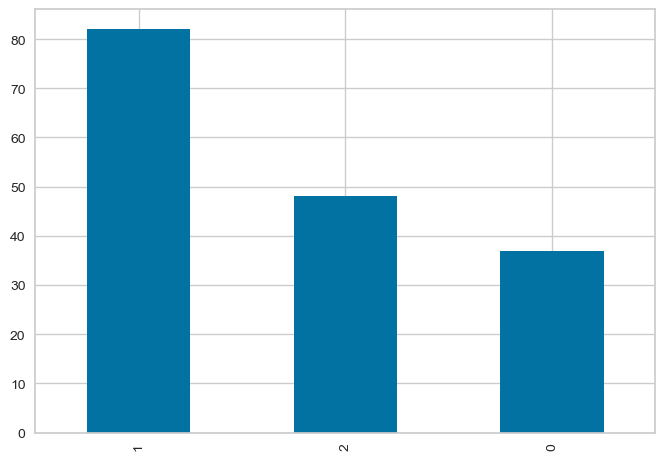

In [39]:
pd.Series(kmean_pred).value_counts().plot(kind='bar')
plt.show()

In [40]:
data['Labels'] = kmean_pred

### Business Interpretaion

In [42]:
data.groupby(by='Labels').mean()

child_mort    exports    health    imports        income  inflation  \
Labels                                                                        
0         5.237838  53.575000  8.780270  49.129054  42690.878378   2.588432   
1        21.508537  40.797317  6.231951  48.097561  12281.097561   7.474744   
2        92.131771  28.546229  6.296458  41.443040   3937.770833  10.438854   

        life_expec  total_fer          gdpp  
Labels                                       
0        79.956757   1.755676  36905.405405  
1        72.875610   2.311707   6291.146341  
2        59.438542   4.953958   1902.916667

In [43]:
lab_map = {0:'Developed',1:'Developing',2:'Under Developed'}

In [44]:
data['Labels'] = data['Labels'].map(lab_map)

In [45]:
data

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   
...                         ...      ...     ...      ...      ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7   2950.0       2.62   
Venezuela                  17.1     28.5    4.91     17.6  16500.0      33.10   
Vietnam                    23.3     72.0    6.84     80.2   4490.0      12.10   
Yemen                      56.3     30.0    5.18     34.4   4480.0      23.60   
Zambia                     83.1     37.0    5.89     30.9   3280.0      14.00   

                     life_expec  total_fer     gdpp           Labels  
country                                                               
Afghanistan                56.2       5.82    553.0  Under Developed  
Albania                    76.3       1.65   4090.0       Developing  
Algeria                    76.5       2.89   4460.0       Developing  
Angola                     60.1       6.16   3530.0  Under Developed  
Antigua and Barbuda        76.8       2.13  12200.0       Developing  
...                         ...        ...      ...              ...  
Vanuatu                    63.0       3.50   2970.0       Developing  
Venezuela                  75.4       2.47  13500.0       Developing  
Vietnam                    73.1       1.95   1310.0       Developing  
Yemen                      67.5       4.67   1310.0  Under Developed  
Zambia                     52.0       5.40   1460.0  Under Developed  

[167 rows x 10 columns]

In [46]:
# Underdeveloped countries
data[data['Labels']=='Under Developed'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

In [47]:
# Developing countries
data[data['Labels']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [48]:
# Developed countries
data[data['Labels']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

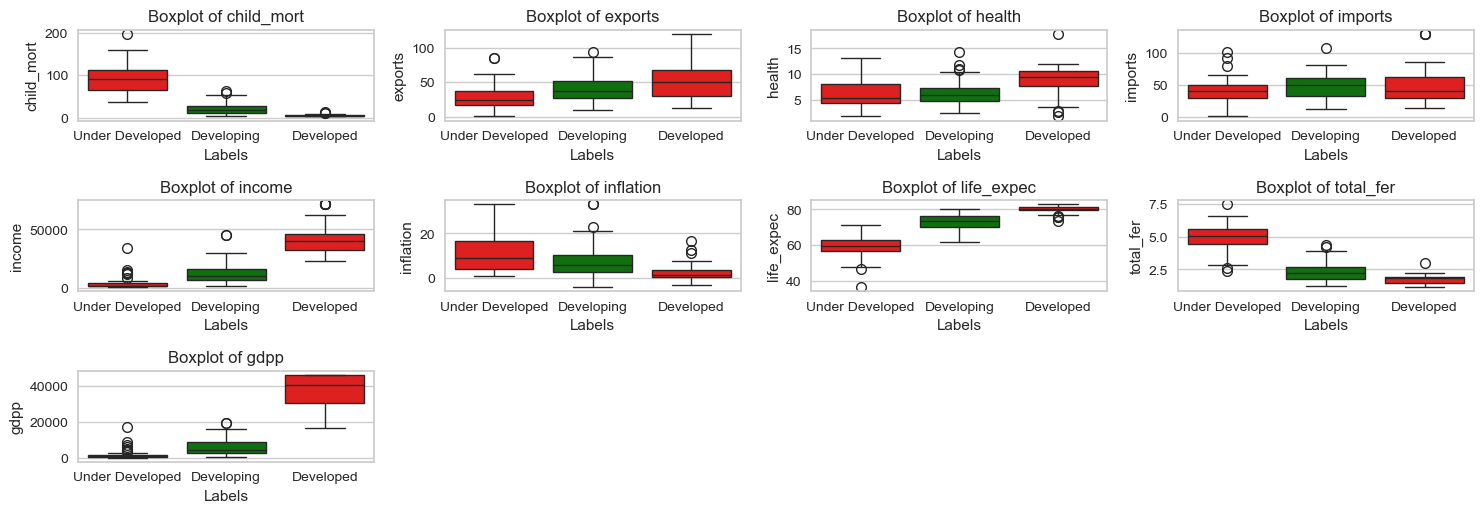

In [49]:
#Lets Explore these Categories
plt.figure(figsize=(15,10))
k = 1
for i in data.columns:
    if i != 'Labels':
        plt.subplot(6,4,k)
        sns.boxplot(x='Labels',y=i,data=data,palette=["red","green"])
        plt.title("Boxplot of {}".format(i))
        k+=1
plt.tight_layout()
plt.show()

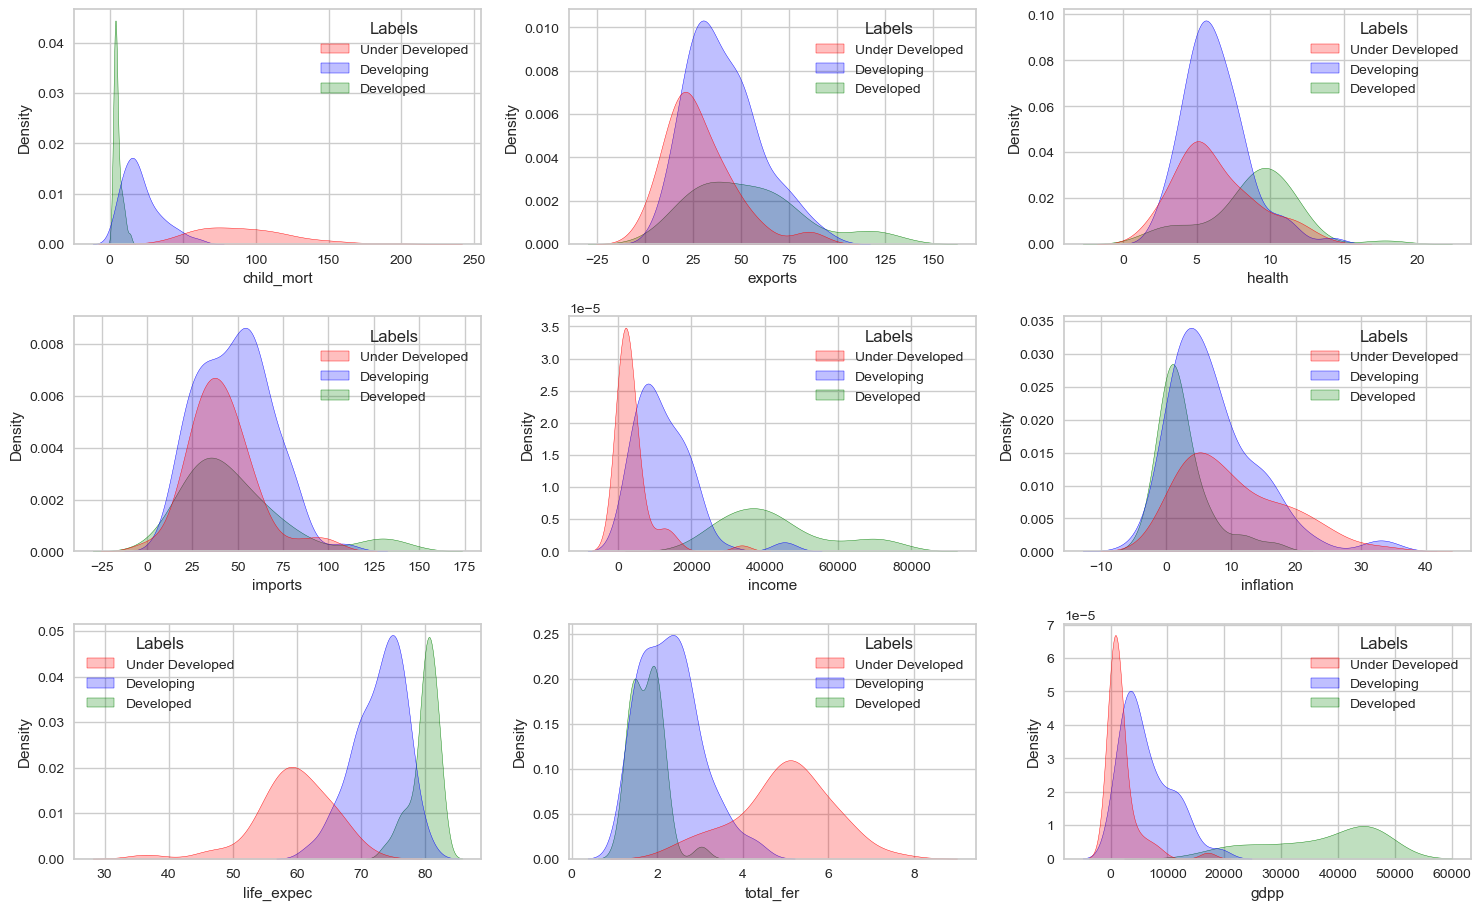

In [50]:
t=1
plt.figure(figsize=(15,15))
for i in data.columns:
    if i != 'Labels':
        plt.subplot(5,3,t)
        sns.kdeplot(data=data,x=i,hue='Labels',palette=['red','blue',"green"],fill=True)
        t = t+1
plt.tight_layout()
plt.show()

**Inferences :**
* Child Mortality, Inflation and Total Fertility is significantly high in Countries that require funds.
* GDP, Income and Life expectancy is significantly low in countries which require funds.

In [52]:
#Lets Plot these Countries on World Map to see which Continents require the Aid

In [53]:
import plotly.express as px
px.choropleth(data,locations=data.index,locationmode='country names',color='Labels',title='Countries Requiring Aid_Credits:Sniggs',
              color_discrete_map={'Developed':'green','Developing':'Pink',"Under Developed":"Brown"},projection='satellite')

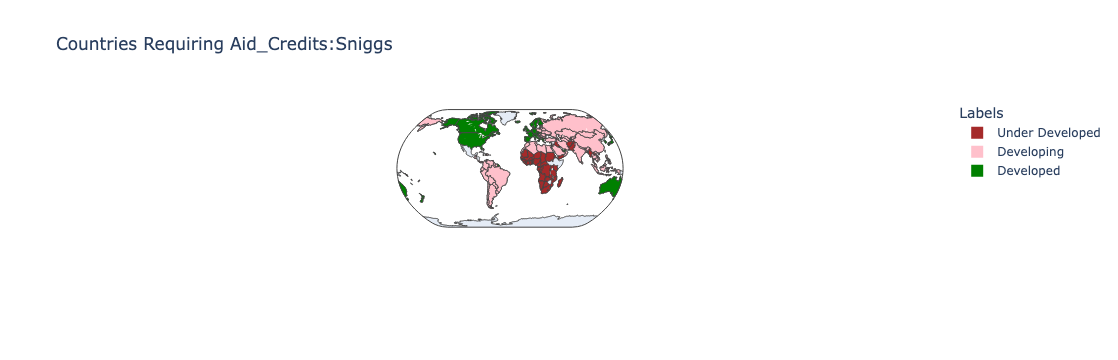

In [95]:
import plotly.express as px
px.choropleth(data,locations=data.index,locationmode='country names',color='Labels',title='Countries Requiring Aid_Credits:Sniggs',
              color_discrete_map={'Developed':'green','Developing':'Pink',"Under Developed":"Brown"},projection='natural earth')

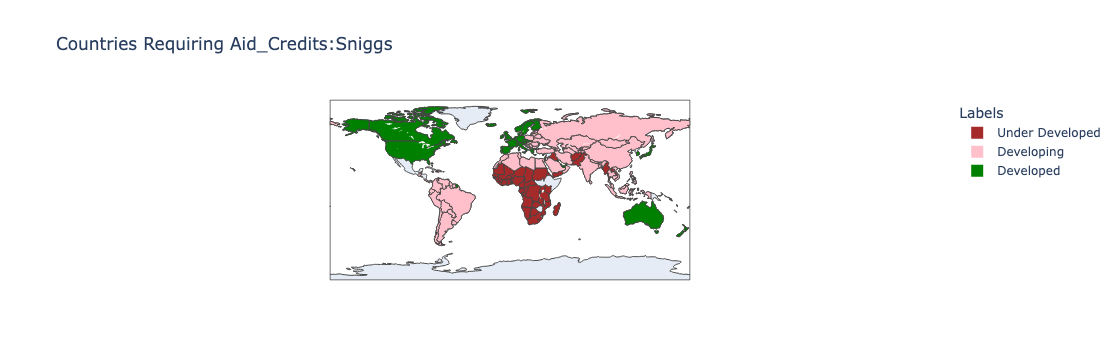

In [97]:
import plotly.express as px
px.choropleth(data,locations=data.index,locationmode='country names',color='Labels',title='Countries Requiring Aid_Credits:Sniggs',
              color_discrete_map={'Developed':'green','Developing':'Pink',"Under Developed":"Brown"})

In [99]:
# Inferences 
# Most of the countries from Asia africa and south america continents requrire the funds 

In [101]:
# Deployment

In [103]:
# We can make predictions using the kmeans clustering it will assign the centroid to the new data point and will
# classify it 

In [107]:
d = [90.2,10,7.58,44.9,1610,6.44,56.2,5.82,1000] # New data (To be predected)

In [109]:
d_s = scaler.transform([d])

In [111]:
d_pc = pca_final.transform(d_s)

In [115]:
kmean_final.predict(d_pc)[0]

2

In [117]:
# Lets Save all these instances in pickle files 
import pickle 

In [121]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [123]:
with open('pca.pkl','wb') as file:
    pickle.dump(pca_final,file)

In [125]:
with open('model.pkl','wb') as file:
    pickle.dump(kmean_final,file)